In [ ]:
# VIZUALIZATION OF BEST PARAMETERS
import queue
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('results/combinations_results.csv', delimiter=',')
df_sorted = df.sort_values(by='solution_cost', ascending=False)
best_solution = df_sorted.iloc[0]

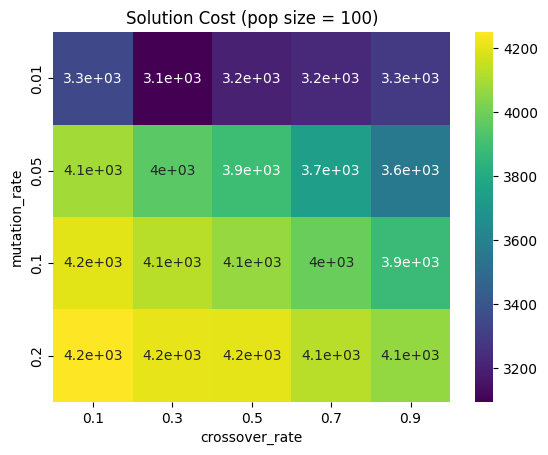

In [4]:
# TEST1: HEATMAP FOR BEST POPULATION SIZE
best_population_size = best_solution['population_size']
subset = df[df['population_size'] == best_population_size]

heatmap_data = subset.pivot_table(
    index='mutation_rate', 
    columns='crossover_rate', 
    values='solution_cost'
)

sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title('Solution Cost (pop size = 100)')
plt.show()

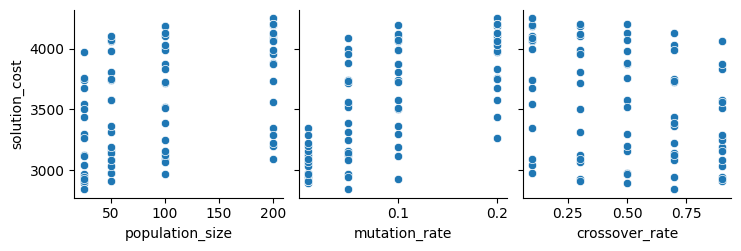

In [5]:
# TEST1: Pairplot
sns.pairplot(df, 
             x_vars=['population_size', 'mutation_rate', 'crossover_rate'], 
             y_vars='solution_cost', 
             kind='scatter')

<Axes: xlabel='mutation_rate', ylabel='crossover_rate'>

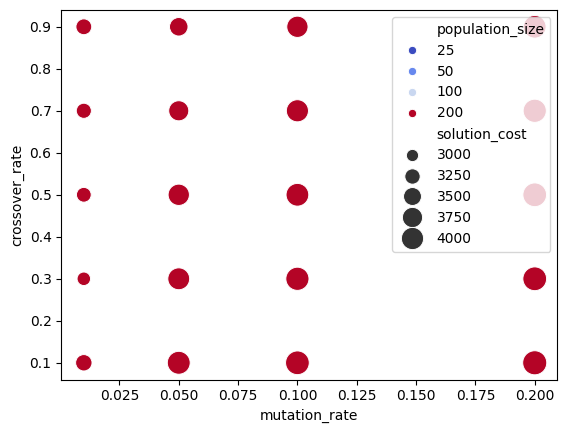

In [6]:
# TEST1: SCATTERPLOT:
sns.scatterplot(data=df, 
                x='mutation_rate', 
                y='crossover_rate', 
                size='solution_cost', 
                hue='population_size', 
                palette='coolwarm', sizes=(50, 300))